In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\HP\\Downloads\\superstore_dataset..csv",encoding='latin1')

print(df)

         ï»¿order_id  order_date  ship_date           customer   manufactory  \
0     US-2020-103800    1/3/2019   1/7/2019      Darren Powers  Message Book   
1     US-2020-112326    1/4/2019   1/8/2019      Phillina Ober           GBC   
2     US-2020-112326    1/4/2019   1/8/2019      Phillina Ober         Avery   
3     US-2020-112326    1/4/2019   1/8/2019      Phillina Ober         SAFCO   
4     US-2020-141817    1/5/2019  1/12/2019         Mick Brown         Avery   
...              ...         ...        ...                ...           ...   
9989  US-2023-126221  12/30/2022   1/5/2023        Chuck Clark        Eureka   
9990  US-2023-143259  12/30/2022   1/3/2023  Patrick O'Donnell         Other   
9991  US-2023-143259  12/30/2022   1/3/2023  Patrick O'Donnell  Wilson Jones   
9992  US-2023-143259  12/30/2022   1/3/2023  Patrick O'Donnell         Other   
9993  US-2023-156720  12/30/2022   1/3/2023      Jill Matthias         Other   

                                       

             sales    profit  discount  quantity
sales     1.000000  0.479064 -0.028190  0.200795
profit    0.479064  1.000000 -0.219487  0.066253
discount -0.028190 -0.219487  1.000000  0.008623
quantity  0.200795  0.066253  0.008623  1.000000


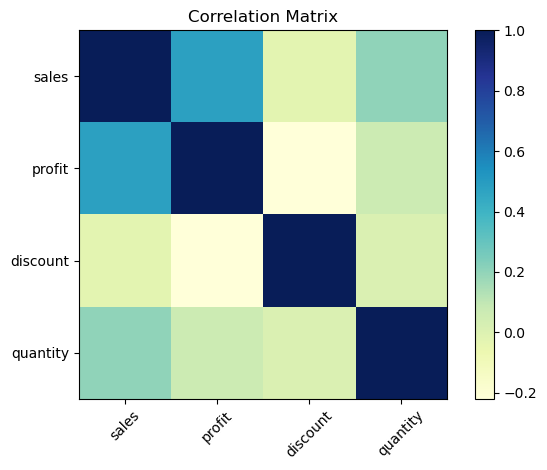

In [28]:
corr = df[["sales", "profit", "discount", "quantity"]].corr()
print(corr)

plt.imshow(corr, cmap='YlGnBu', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [20]:
df.dropna(inplace=True)

# Convert Order Date to datetime
df["order_date"] = pd.to_datetime(df["order_date"])

# Create Year and Month columns
df["Year"] = df["order_date"].dt.year
df["Month"] = df["order_date"].dt.month

# Print basic stats
print("Total Sales: ₹", df["sales"].sum())
print("Total Profit: ₹", df["profit"].sum())

Total Sales: ₹ 2297200.8603
Total Profit: ₹ 286397.02170000004


In [3]:
df.head()#display five rows

,ï»¿order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


    Year  Month        sales       Date
0   2019      1   14236.8950 2019-01-01
1   2019      2    4519.8920 2019-02-01
2   2019      3   55691.0090 2019-03-01
3   2019      4   28295.3450 2019-04-01
4   2019      5   23648.2870 2019-05-01
5   2019      6   34595.1276 2019-06-01
6   2019      7   33946.3930 2019-07-01
7   2019      8   27909.4685 2019-08-01
8   2019      9   81777.3508 2019-09-01
9   2019     10   31453.3930 2019-10-01
10  2019     11   78628.7167 2019-11-01
11  2019     12   69545.6205 2019-12-01
12  2020      1   18174.0756 2020-01-01
13  2020      2   11951.4110 2020-02-01
14  2020      3   38726.2520 2020-03-01
15  2020      4   34195.2085 2020-04-01
16  2020      5   30131.6865 2020-05-01
17  2020      6   24797.2920 2020-06-01
18  2020      7   28765.3250 2020-07-01
19  2020      8   36898.3322 2020-08-01
20  2020      9   64595.9180 2020-09-01
21  2020     10   31404.9235 2020-10-01
22  2020     11   75972.5635 2020-11-01
23  2020     12   74919.5212 2020-12-01


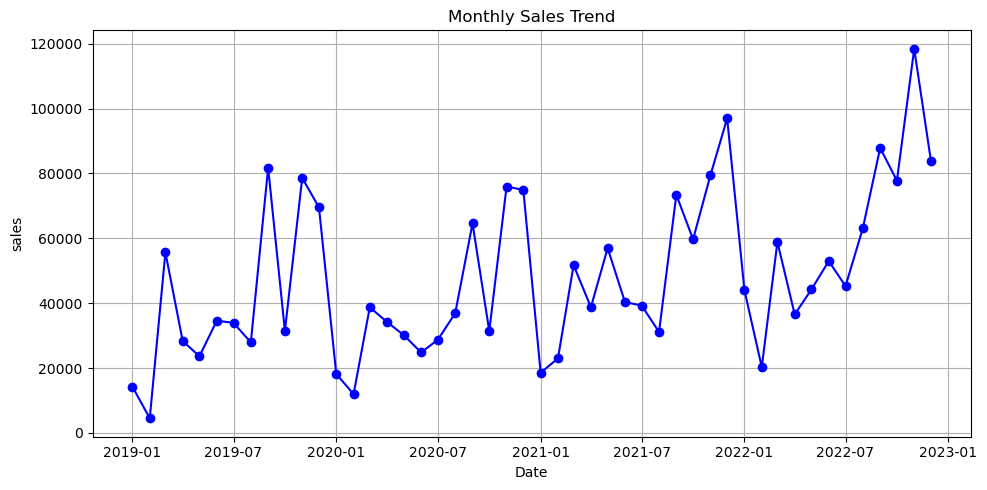

In [26]:
#Monthly Sales Trend
df["order_date"] = pd.to_datetime(df["order_date"])
df["Year"] = df["order_date"].dt.year
df["Month"] = df["order_date"].dt.month
monthly = df.groupby(["Year", "Month"])["sales"].sum().reset_index()
monthly["Date"] = pd.to_datetime(monthly[["Year", "Month"]].assign(DAY=1))
print(monthly)

plt.figure(figsize=(10,5))
plt.plot(monthly["Date"], monthly["sales"], marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("sales")
plt.grid(True)
plt.tight_layout()
plt.show()

category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: sales, dtype: float64


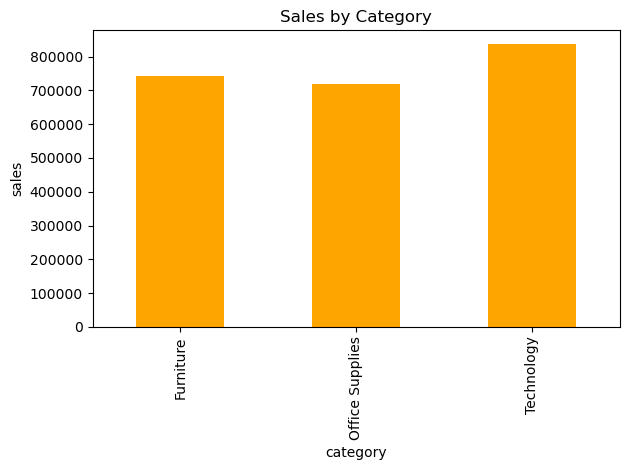

In [25]:
#Sales by Category
category_sales = df.groupby("category")["sales"].sum()
print(category_sales)
category_sales.plot(kind="bar", color="orange")
plt.title("Sales by Category")
plt.xlabel("category")
plt.ylabel("sales")
plt.tight_layout()
plt.show()

category
Office Supplies    719047.0320
Furniture          741999.7953
Technology         836154.0330
Name: sales, dtype: float64


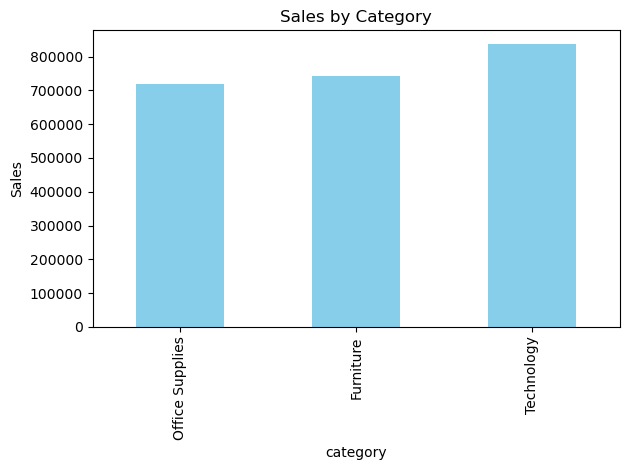

In [24]:
#Sales by Category
category_sales = df.groupby("category")["sales"].sum().sort_values()
print(category_sales)
category_sales.plot(kind="bar", title="Sales by Category", color="skyblue")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: sales, dtype: float64


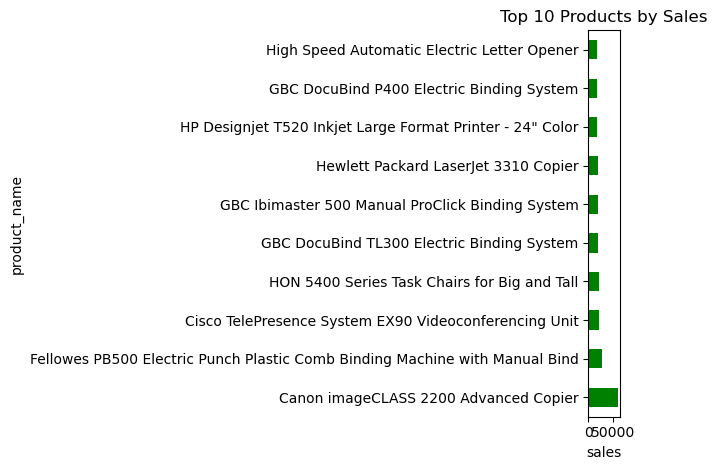

In [32]:
#Top 10 Products by Sales
top_products = df.groupby("product_name")["sales"].sum().sort_values(ascending=False).head(10)
print(top_products)
top_products.plot(kind="barh", color="green")
plt.title("Top 10 Products by Sales")
plt.xlabel("sales")
plt.tight_layout()
plt.show()